# Fonctions de deux variables

**Librairies**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

On suppose pour l'ensemble de ce chapitre :

Soit $D$ une partie ouverte de $\mathbb{R}^2$, et soit $f : D \rightarrow \mathbb{R}^2$ une fonction de classe $\mathcal{C}^1$.

Cela signifie que les dérivées partielles de $f$, notées $\partial_1 f$ et $\partial_2 f$, existent et sont continues sur $D$.


### Représenter grahiquement une fonction de 2 variables

Le graphe d’une fonction d’une seule variable $x \mapsto f(x)$ définie sur un intervalle $I$ est la courbe $C_f$ du plan formée de tous les points  
$M = \begin{pmatrix} x \\ f(x) \end{pmatrix}$ lorsque $x$ décrit $I$.

Pour faire la représentation graphique d’une fonction d’une variable $x \mapsto f(x)$ définie sur un intervalle $[a, b]$,  
on prend une subdivision de $n$ points du segment $[a, b]$, puis on trace une ligne brisée reliant les points  
$M = \begin{pmatrix} x \\ f(x) \end{pmatrix}$ lorsque $x$ décrit $X$.

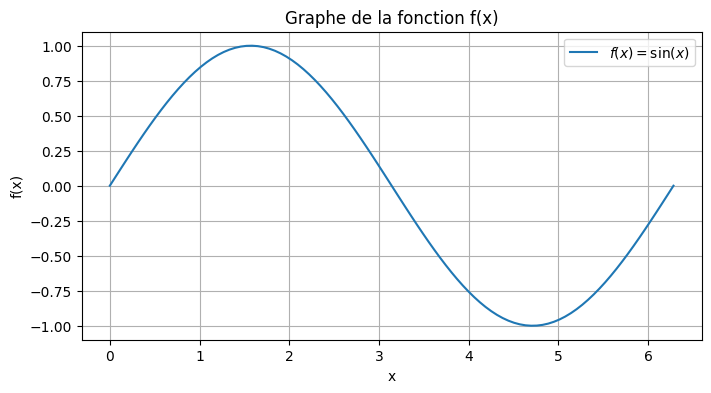

In [12]:
def f(x):
    return np.sin(x)  # exemple : sin(x)

# Domaine
a, b = 0, 2 * np.pi
x = np.linspace(a, b, 100)
y = f(x)

# Tracé
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=r'$f(x) = \sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graphe de la fonction f(x)")
plt.grid(True)
plt.legend()
plt.show()

Le graphe d’une fonction de deux variables $(x, y) \mapsto f(x, y)$ définie sur un ouvert $D$  
est la surface $S_f$ de l’espace formée de tous les points  
$M = \begin{pmatrix} x \\ y \\ f(x, y) \end{pmatrix}$ lorsque $(x, y)$ décrit l’ensemble $D$.

Pour faire la représentation graphique d’une fonction de deux variables $(x, y) \mapsto f(x, y)$ définie sur un rectangle  
$D = [a, b] \times [c, d]$, on prend une subdivision $X$ de $[a, b]$, une subdivision $Y$ de $[c, d]$ ;  
le produit cartésien $X \times Y$ est un maillage de $D$.  
Ensuite, on trace (en perspective) des quadrilatères dont les sommets sont les points  
$M = \begin{pmatrix} x \\ y \\ f(x, y) \end{pmatrix}$ lorsque $(x, y)$ décrit $X \times Y$.


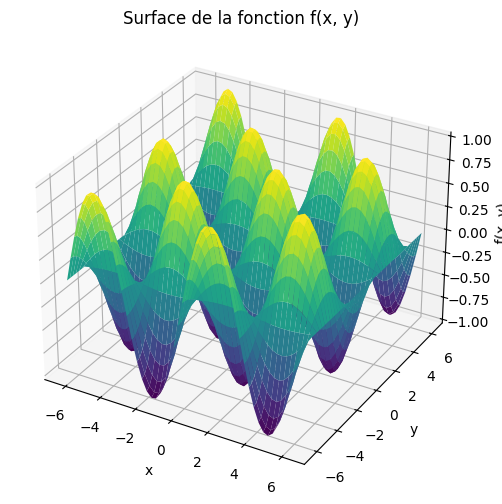

In [13]:
def f(x, y):
    return np.sin(x) * np.cos(y)  # exemple : sin(x) * cos(y)

# Domaine
a, b = -2 * np.pi, 2 * np.pi
c, d = -2 * np.pi, 2 * np.pi

# Subdivisions
X = np.linspace(a, b, 50)
Y = np.linspace(c, d, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Tracé 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title("Surface de la fonction f(x, y)")
plt.show()

### Lignes de niveau

Soit $k \in \mathbb{R}$.

L’ensemble $L_k = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in D \; \middle| \; f(x, y) = k \right\}$  
est formé des points $M \in D$ pour lesquels $f(M) = k$ : c’est une **ligne de niveau** de $f$.

On pose  
$C_k = \left\{ \begin{pmatrix} x \\ y \\ f(x, y) \end{pmatrix} \in \mathbb{R}^3 \; \middle| \; (x, y) \in L_k \right\}$ ;

on voit que  
$C_k = \left\{ \begin{pmatrix} x \\ y \\ k \end{pmatrix} \in \mathbb{R}^3 \; \middle| \; (x, y) \in L_k \right\}$,  
donc $C_k$ est l’intersection de la surface $S_f$ et du plan d’équation $(z = k)$.

On dit par abus de langage que c’est **la ligne de niveau tracée dans le plan** $(z = k)$.

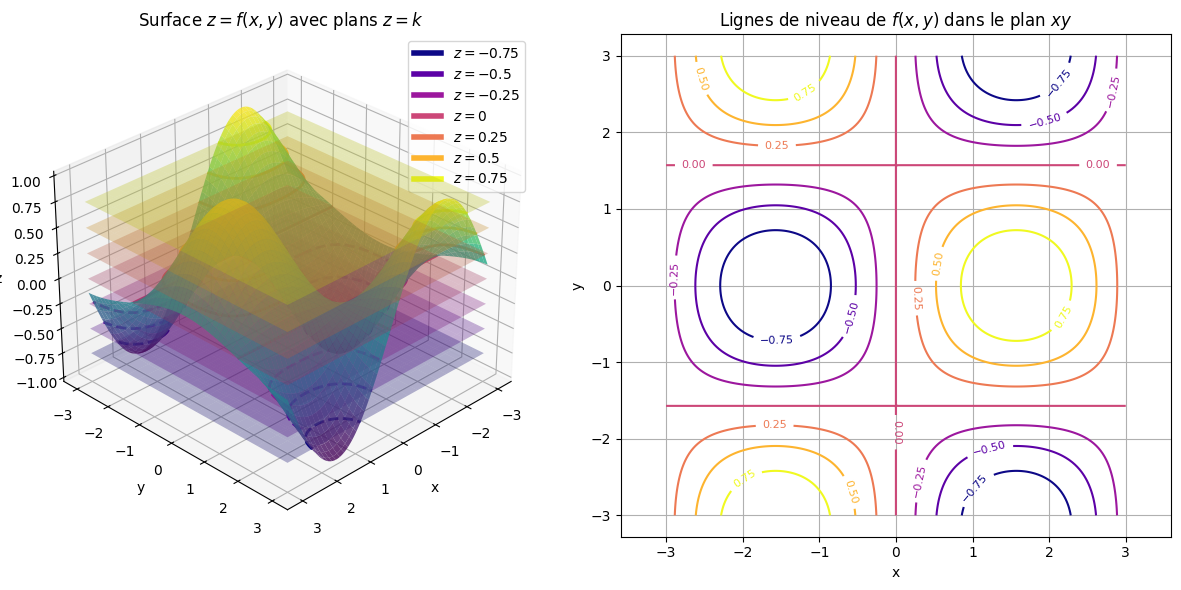

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Fonction à tracer
def f(x, y):
    return np.sin(x) * np.cos(y)

# Domaine
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Niveaux z = k
levels = [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]
colors = plt.cm.plasma(np.linspace(0, 1, len(levels)))

# === FIGURE 1 : Surface + plans z = k ===
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

# Surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Plans horizontaux + légende
custom_lines = []
for k, color in zip(levels, colors):
    ax.plot_surface(X, Y, np.full_like(Z, k), color=color, alpha=0.3, rstride=10, cstride=10, linewidth=0)
    c = ax.contour(X, Y, Z, levels=[k], zdir='z', offset=k, colors=[color], linewidths=2)
    custom_lines.append(Line2D([0], [0], color=color, lw=4, label=f"$z = {k}$"))

# Légende et axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Surface $z = f(x, y)$ avec plans $z = k$")
ax.view_init(elev=30, azim=45)
ax.legend(handles=custom_lines, loc='upper right')

# === FIGURE 2 : Courbes de niveau projetées (plan xy) ===
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=levels, colors=colors)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_title("Lignes de niveau de $f(x, y)$ dans le plan $xy$")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)
ax2.axis('equal')

plt.tight_layout()
plt.show()


### 🔹 Fonctions partielles

Soit une fonction $f : D \subset \mathbb{R}^2 \to \mathbb{R}$, et soit $m = (a, b) \in D$.

#### 🔸 Fonction partielle par rapport à $x$ (avec $y = b$ fixé) :

On définit la fonction partielle $f^{(b)}_x$ par :

$$
f^{(b)}_x(x) = f(x, b), \quad \text{pour tout } x \in \mathbb{R} \text{ tel que } (x, b) \in D.
$$

#### 🔸 Fonction partielle par rapport à $y$ (avec $x = a$ fixé) :

On définit la fonction partielle $f^{(a)}_y$ par :

$$
f^{(a)}_y(y) = f(a, y), \quad \text{pour tout } y \in \mathbb{R} \text{ tel que } (a, y) \in D.
$$

Ces deux fonctions sont des **fonctions d'une seule variable réelle**, obtenues en **fixant l'une des variables**.

Graphiquement, leur représentation est une **courbe tracée sur la surface** $S_f$ (le graphe de la fonction $f$).

> Pour tracer ces courbes en 3D avec `matplotlib`, on utilise par exemple : `ax.plot(x, y, z)`.

---

### 🔹 Dérivées partielles

Si les fonctions partielles sont **dérivables** au point $m = (a, b)$, alors les **dérivées partielles de $f$** en $m$ sont définies par :

$$
\frac{\partial f}{\partial x}(a, b) = \left(f^{(b)}_x\right)'(a), \quad
\frac{\partial f}{\partial y}(a, b) = \left(f^{(a)}_y\right)'(b).
$$

---

### 🔹 Vecteur gradient

Le **gradient** de $f$ au point $m = (a, b)$ est le vecteur :

$$
\nabla f(a, b) =
\begin{pmatrix}
\frac{\partial f}{\partial x}(a, b) \\
\frac{\partial f}{\partial y}(a, b)
\end{pmatrix}.
$$

Ce vecteur indique la direction dans laquelle $f$ **croît le plus rapidement** au point $m$.

---

### 🔹 Fonction directionnelle

Soit $\vec{u} = (u_x, u_y) \in \mathbb{R}^2$ un vecteur direction.
La **fonction directionnelle** associée à $f$ au point $m = (a, b)$ dans la direction $\vec{u}$ est la fonction à une variable :

$$
f_{\vec{u}}(t) = f\big(m + t\vec{u}\big) = f(a + t u_x,\, b + t u_y),
$$

définie pour tout $t \in \mathbb{R}$ tel que $m + t\vec{u} \in D$.

---

### 🔹 Cas particuliers – Base canonique :

Si $\vec{e}_1 = (1, 0)$ et $\vec{e}_2 = (0, 1)$ sont les vecteurs de la base canonique de $\mathbb{R}^2$, alors :

$$
f^{(b)}_x = f_{\vec{e}_1}, \quad f^{(a)}_y = f_{\vec{e}_2}.
$$

Autrement dit, les **fonctions partielles classiques** sont des **cas particuliers** des fonctions directionnelles.

---

### 🔹 Courbe directionnelle sur la surface $S_f$

L'ensemble des points de la forme :

$$
\mathcal{C}_{\vec{u}, m} = \left\{
\begin{pmatrix}
a + t u_x \\
b + t u_y \\
f_{\vec{u}}(t)
\end{pmatrix}
\ :\ t \in \mathbb{R},\ m + t\vec{u} \in D
\right\}
$$

représente une **courbe tracée sur la surface** $S_f$ (le graphe de $f$).

Cette courbe est l’**intersection** entre la surface $z = f(x, y)$ et le **plan passant par** le point :

$$
A = 
\begin{pmatrix}
a \\
b \\
f(a, b)
\end{pmatrix}
$$

et dirigé par les vecteurs :

$$
\vec{u}_\text{sol} =
\begin{pmatrix}
u_x \\
u_y \\
0
\end{pmatrix}
\quad \text{et} \quad
\vec{e}_z =
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}.
$$


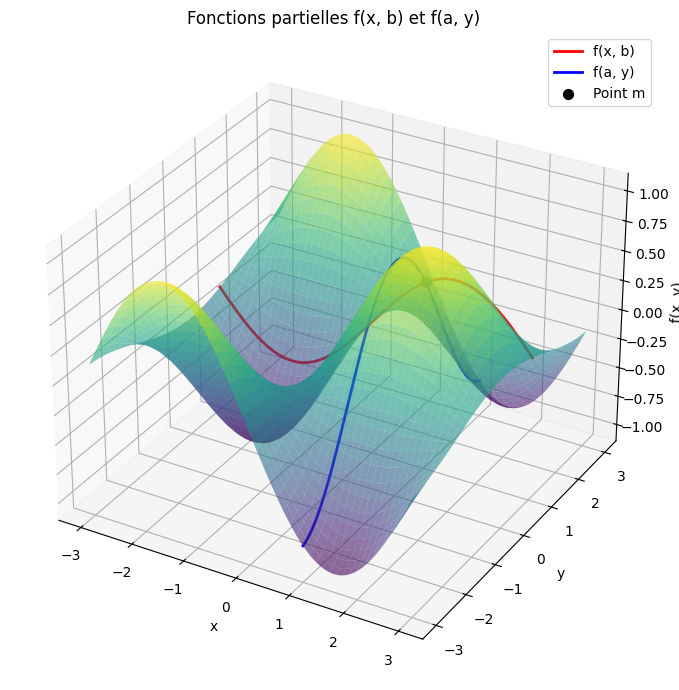

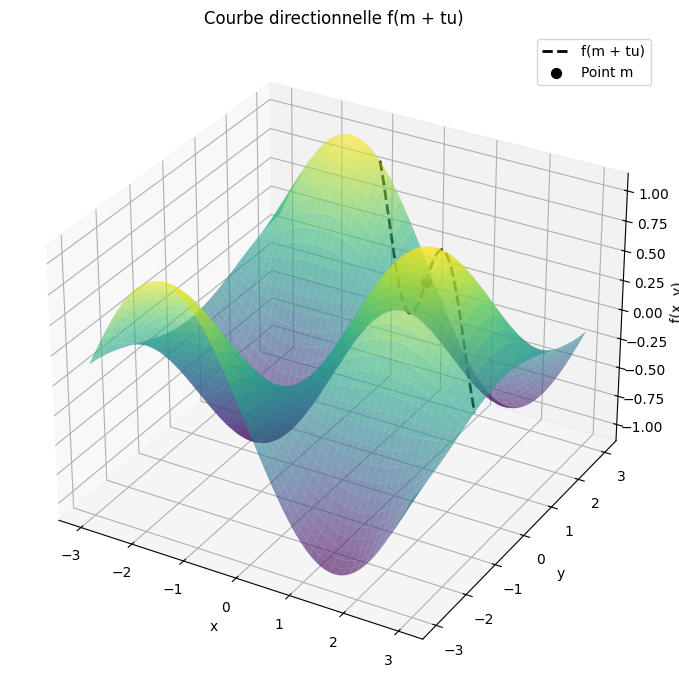

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === 1. Définir la fonction f(x, y) ===
def f(x, y):
    return np.sin(x) * np.cos(y)

# === 2. Domaine et surface ===
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# === 3. Point m = (a, b) et direction u ===
a, b = 1.0, 1.0
ux, uy = 1.0, -1.0

# === 4. Courbes partielles f(x, b) et f(a, y) ===
x_partial = np.linspace(-3, 3, 200)
y_partial = np.linspace(-3, 3, 200)
curve_x = np.array([x_partial, np.full_like(x_partial, b), f(x_partial, b)])
curve_y = np.array([np.full_like(y_partial, a), y_partial, f(a, y_partial)])

# === 5. Courbe directionnelle f(m + t*u) ===
t = np.linspace(-2, 2, 200)
x_dir = a + t * ux
y_dir = b + t * uy
z_dir = f(x_dir, y_dir)
curve_dir = np.array([x_dir, y_dir, z_dir])

# === 6. Plot 1 : Surface + courbes partielles ===
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')

ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')
ax1.plot(curve_x[0], curve_x[1], curve_x[2], color='red', linewidth=2, label=r"f(x, b)")
ax1.plot(curve_y[0], curve_y[1], curve_y[2], color='blue', linewidth=2, label=r"f(a, y)")
ax1.scatter([a], [b], [f(a, b)], color='black', marker='o', s=50, label="Point m")

ax1.set_title("Fonctions partielles f(x, b) et f(a, y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")
# ax1.view_init(elev=30, azim=45)
ax.view_init(elev=45, azim=110)
ax1.legend()
plt.tight_layout()

# === 7. Plot 2 : Surface + courbe directionnelle ===
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')
ax2.plot(curve_dir[0], curve_dir[1], curve_dir[2], color='black', linestyle='--', linewidth=2, label=r"f(m + tu)")
ax2.scatter([a], [b], [f(a, b)], color='black', marker='o', s=50, label="Point m")

ax2.set_title("Courbe directionnelle f(m + tu)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x, y)")
ax.view_init(elev=45, azim=110)
ax2.legend()
plt.tight_layout()

plt.show()



Voici ton paragraphe complété avec les **différents cas selon le signe des valeurs propres** de la Hessienne, pour l’étude de la position de la surface $S_f$ par rapport au plan tangent en un point :

---

### Position par rapport au plan tangent, extrema sur un ouvert

Dans ce paragraphe, on suppose $f$ de classe $\mathcal{C}^2$.
On rappelle que la **Hessienne** de $f$ en $m$ est la matrice (symétrique par le théorème de Schwarz) :

$$
H =
\begin{pmatrix}
\frac{\partial^2 f}{\partial x^2}(m) & \frac{\partial^2 f}{\partial x \partial y}(m) \\
\frac{\partial^2 f}{\partial y \partial x}(m) & \frac{\partial^2 f}{\partial y^2}(m)
\end{pmatrix}
$$


Nous allons illustrer la position de $S_f$ par rapport au plan tangent $\mathcal{P}$ en $A = m$ selon le **signe des valeurs propres** de $H$ :

#### 🔹 Cas 1 : Les deux valeurs propres sont **strictement positives**

* La surface est **au-dessus** du plan tangent au voisinage de $m$.
* $m$ est un **minimum local**.

#### 🔹 Cas 2 : Les deux valeurs propres sont **strictement négatives**

* La surface est **en-dessous** du plan tangent au voisinage de $m$.
* $m$ est un **maximum local**.

#### 🔹 Cas 3 : Les deux valeurs propres sont de **signes opposés**

* La surface **passe au-dessus et en dessous** du plan tangent selon les directions.
* $m$ est un **point selle**.

#### 🔹 Cas 4 : Une ou deux valeurs propres sont **nulles**

* Le test est **inconcluant** : on ne peut pas conclure sur la nature de $m$ uniquement avec la Hessienne.
* Il faut étudier des dérivées d'ordre supérieur ou utiliser d'autres méthodes.

Hessienne H(m) =
 [[2. 0.]
 [0. 2.]]
Valeurs propres : [2. 2.]
Type de point : Minimum local


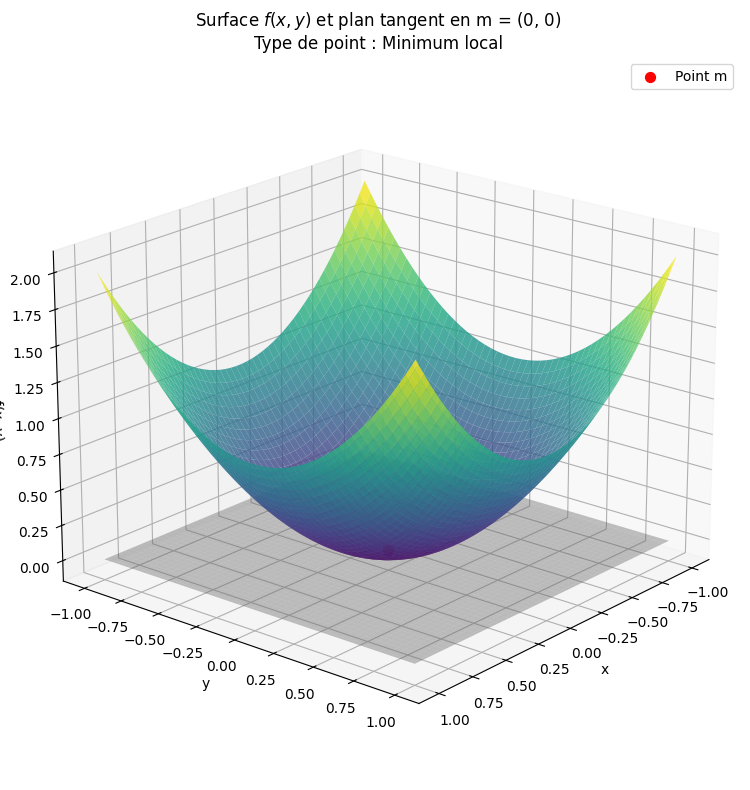

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === 1. Définition de la fonction f(x, y) ===
def f(x, y):
    # Cas 1 : minimum local
    return x**2 + y**2
    
    # Cas 2 : maximum local
    # return -x**2 - y**2
    
    # # Cas 3 : point selle
    # return x**2 - y**2

# === 2. Point m = (a, b) où on évalue la Hessienne ===
a, b = 0, 0

# === 3. Dérivées partielles numériques autour de (a, b) ===
# PAS AU PROGRAMME
def partial_derivatives(f, a, b, h=1e-4): 
    f_x  = (f(a + h, b) - f(a - h, b)) / (2 * h)
    f_y  = (f(a, b + h) - f(a, b - h)) / (2 * h)
    f_xx = (f(a + h, b) - 2*f(a, b) + f(a - h, b)) / h**2
    f_yy = (f(a, b + h) - 2*f(a, b) + f(a, b - h)) / h**2
    f_xy = (f(a + h, b + h) - f(a + h, b - h) - f(a - h, b + h) + f(a - h, b - h)) / (4 * h**2)
    return f_x, f_y, f_xx, f_yy, f_xy

# Calcul des dérivées et de la Hessienne
fx, fy, fxx, fyy, fxy = partial_derivatives(f, a, b)
H = np.array([[fxx, fxy],
              [fxy, fyy]])

# === 4. Valeurs propres de la Hessienne ===
eigenvalues = np.linalg.eigvals(H)

# === 5. Interprétation du point m ===
def classify_critical_point(eigenvalues):
    if np.all(eigenvalues > 0):
        return "Minimum local"
    elif np.all(eigenvalues < 0):
        return "Maximum local"
    elif np.any(eigenvalues > 0) and np.any(eigenvalues < 0):
        return "Point selle"
    else:
        return "Cas indéterminé (valeurs propres nulles)"

point_type = classify_critical_point(eigenvalues)

print("Hessienne H(m) =\n", H)
print("Valeurs propres :", eigenvalues)
print("Type de point :", point_type)

# === 6. Plan tangent ===
def tangent_plane(x, y):
    return f(a, b) + fx * (x - a) + fy * (y - b)

# === 7. Domaine de tracé ===
x = np.linspace(a - 1, a + 1, 100)
y = np.linspace(b - 1, b + 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z_tangent = tangent_plane(X, Y)

# === 8. Tracé 3D ===
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface f(x, y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Plan tangent
ax.plot_surface(X, Y, Z_tangent, alpha=0.4, color='gray')

# Point critique m
ax.scatter([a], [b], [f(a, b)], color='red', s=50, label='Point m')

# Axes et titre
ax.set_title(f"Surface $f(x, y)$ et plan tangent en m = ({a}, {b})\nType de point : {point_type}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.view_init(elev=20, azim=40)

plt.legend()
plt.tight_layout()
plt.show()


### Extremum sous contraintes égalités

On considère deux fonctions définies sur un ouvert $D \subset \mathbb{R}^2$, de classe $\mathcal{C}^1$, à valeurs réelles, $f$ et $g$.

Pour $k \in g(D)$, on définit l’ensemble $\mathcal{C} = \{(x, y) \in D \mid g(x, y) = k \}$ des contraintes. Le programme officiel se limite au cas où $g$ est linéaire non nulle, i.e. $g(x, y) = ax + by$, $(a, b) \in \mathbb{R}^2 \setminus \{(0, 0)\}$.

On veut illustrer le résultat suivant (Théorème des multiplicateurs de Lagrange) : 

Si la contrainte $g(x, y) = k$ est **lisse** (c’est-à-dire que $\vec{\nabla} g \neq 0$ sur l'ensemble $\mathcal{C}$), alors :

> **Si** la fonction $f$ atteint un **maximum ou un minimum** en un point $m$ **sous la contrainte** $g(x, y) = k$,
> **alors** les gradients $\vec{\nabla} f(m)$ et $\vec{\nabla} g(m)$ sont **colinéaires**.

En d’autres termes :

$$
\vec{\nabla} f(m) = \lambda \, \vec{\nabla} g(m)
$$

pour un certain réel $\lambda$.

On veut **trouver un extremum (ici un maximum)** de la fonction :

$$
f(x, y) = -x + y - 2(x^2 + y^2)
$$

**sous la contrainte** :

$$
g(x, y) = x = -1
$$

Nous allons appliquer une méthode **géométrique** et **visuelle** pour :

* Repérer où se trouve le maximum de $f$ **sur la contrainte** (la droite verticale $x = -1$),
* Et **vérifier graphiquement et analytiquement** que ce point respecte **la condition de Lagrange**.

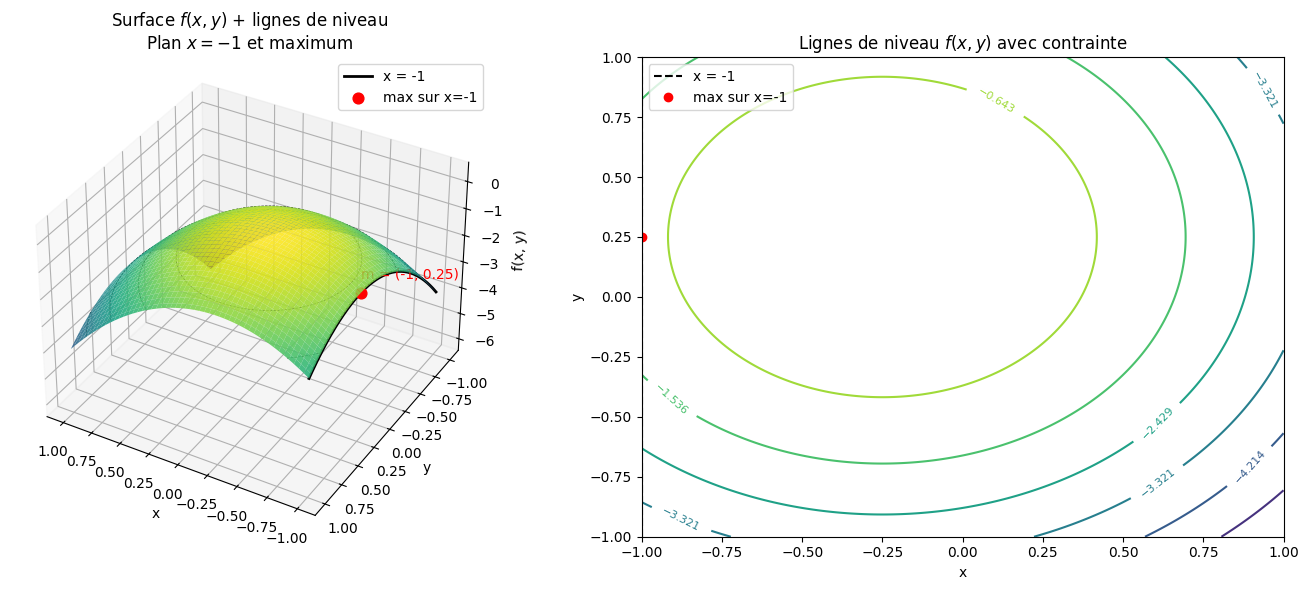

Point m = (-1, 0.25)
f(m) = -0.8750
∇f(m) = [3. 0.]
∇g(m) = [1 0]
Produit vectoriel ∇f ∧ ∇g = 0.0
✅ Les gradients ∇f(m) et ∇g(m) sont colinéaires.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === 1. Fonction et contrainte ===
def f(x, y):
    return -x + y - 2 * (x**2 + y**2)

def grad_f(x, y):
    return np.array([-1 - 4*x, 1 - 4*y])

def grad_g(x, y):
    return np.array([1, 0])  # car g(x, y) = x

# === 2. Domaine ===
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# === 3. Couleurs de niveaux communes ===
contour_levels = np.linspace(Z.min(), Z.max(), 8)
colors = plt.cm.viridis(np.linspace(0, 1, len(contour_levels)))

# === 4. Maximum sur la contrainte x = -1 ===
y_vals = np.linspace(-1, 1, 500)
z_vals = f(-1, y_vals)
idx_max = np.argmax(z_vals)
# y_max = y_vals[idx_max]
y_max = 0.25 
z_max = z_vals[idx_max]
m = (-1, y_max)

# === 5. Figures ===
fig = plt.figure(figsize=(14, 6))

# --- 3D Surface avec niveaux colorés et plan x = -1 ---
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Lignes de niveau sur la surface (aux vraies hauteurs)
ax1.contour(X, Y, Z, levels=contour_levels, colors='k', linewidths=0.5)

# Mur x = -1 (plan vertical)
Y_wall = np.linspace(-1, 1, 200)
Z_wall = f(-1, Y_wall)
X_wall = -1 * np.ones_like(Y_wall)
ax1.plot(X_wall, Y_wall, Z_wall, color='black', linewidth=2, label='x = -1')

# Point du maximum
ax1.scatter(*m, z_max, color='red', s=60, label='max sur x=-1')
ax1.text(m[0], m[1], z_max + 0.5, f"m = ({m[0]}, {m[1]:.2f})", color='red')

ax1.set_title("Surface $f(x, y)$ + lignes de niveau\nPlan $x = -1$ et maximum")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")
ax1.view_init(elev=25, azim=40)
ax1.legend()

# --- 2D : Lignes de niveau avec contrainte et max ---
ax2 = fig.add_subplot(122)
contour2 = ax2.contour(X, Y, Z, levels=contour_levels, cmap='viridis')
ax2.clabel(contour2, inline=True, fontsize=8)

# Contrainte x = -1
ax2.axvline(x=-1, color='black', linestyle='--', label='x = -1')

# Point m
ax2.plot(m[0], m[1], 'ro', label='max sur x=-1')

ax2.set_title("Lignes de niveau $f(x, y)$ avec contrainte")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax1.view_init(elev=35, azim=120)
plt.tight_layout()
plt.show()

# === 6. Analyse des gradients ===
grad_f_m = grad_f(*m)
grad_g_m = grad_g(*m)
print(f"Point m = {m}")
print(f"f(m) = {f(*m):.4f}")
print(f"∇f(m) = {grad_f_m}")
print(f"∇g(m) = {grad_g_m}")

# === 7. Colinéarité des gradients ===
cross = np.cross(grad_f_m, grad_g_m)
print(f"Produit vectoriel ∇f ∧ ∇g = {cross}")

if np.allclose(cross, 0):
    print("✅ Les gradients ∇f(m) et ∇g(m) sont colinéaires.")
else:
    print("❌ Les gradients ne sont pas colinéaires.")
